In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import matplotlib as mtl
import numpy as np
import scipy 
import consts
import input_output
import plotting

In [ ]:
currents = consts.CURRENTS

In [3]:
neurons, astrocytes, neurons_ttx, astrocytes_ttx = {},{},{},{}
for m_info in input_output.mouse_infos(only_mouse=72, load_ttx=True):
    ss1 = m_info['stimulations_starts'][0]
    n = np.average(m_info['neurons'], axis = (1, 2))
    n = n - np.average(n[:ss1])
    a = np.average(m_info['astrocytes'], axis = (1, 2))
    a = a - np.average(a[:ss1])
    if m_info['is_ttx']:
        neurons_ttx[m_info['current']] = n
        astrocytes_ttx[m_info['current']] = a
    else:
        neurons[m_info['current']] = n
        astrocytes[m_info['current']] = a
all_dics = [neurons, astrocytes, neurons_ttx, astrocytes_ttx]


Text(0.5, 1.0, 'Full field of view, Neuron')

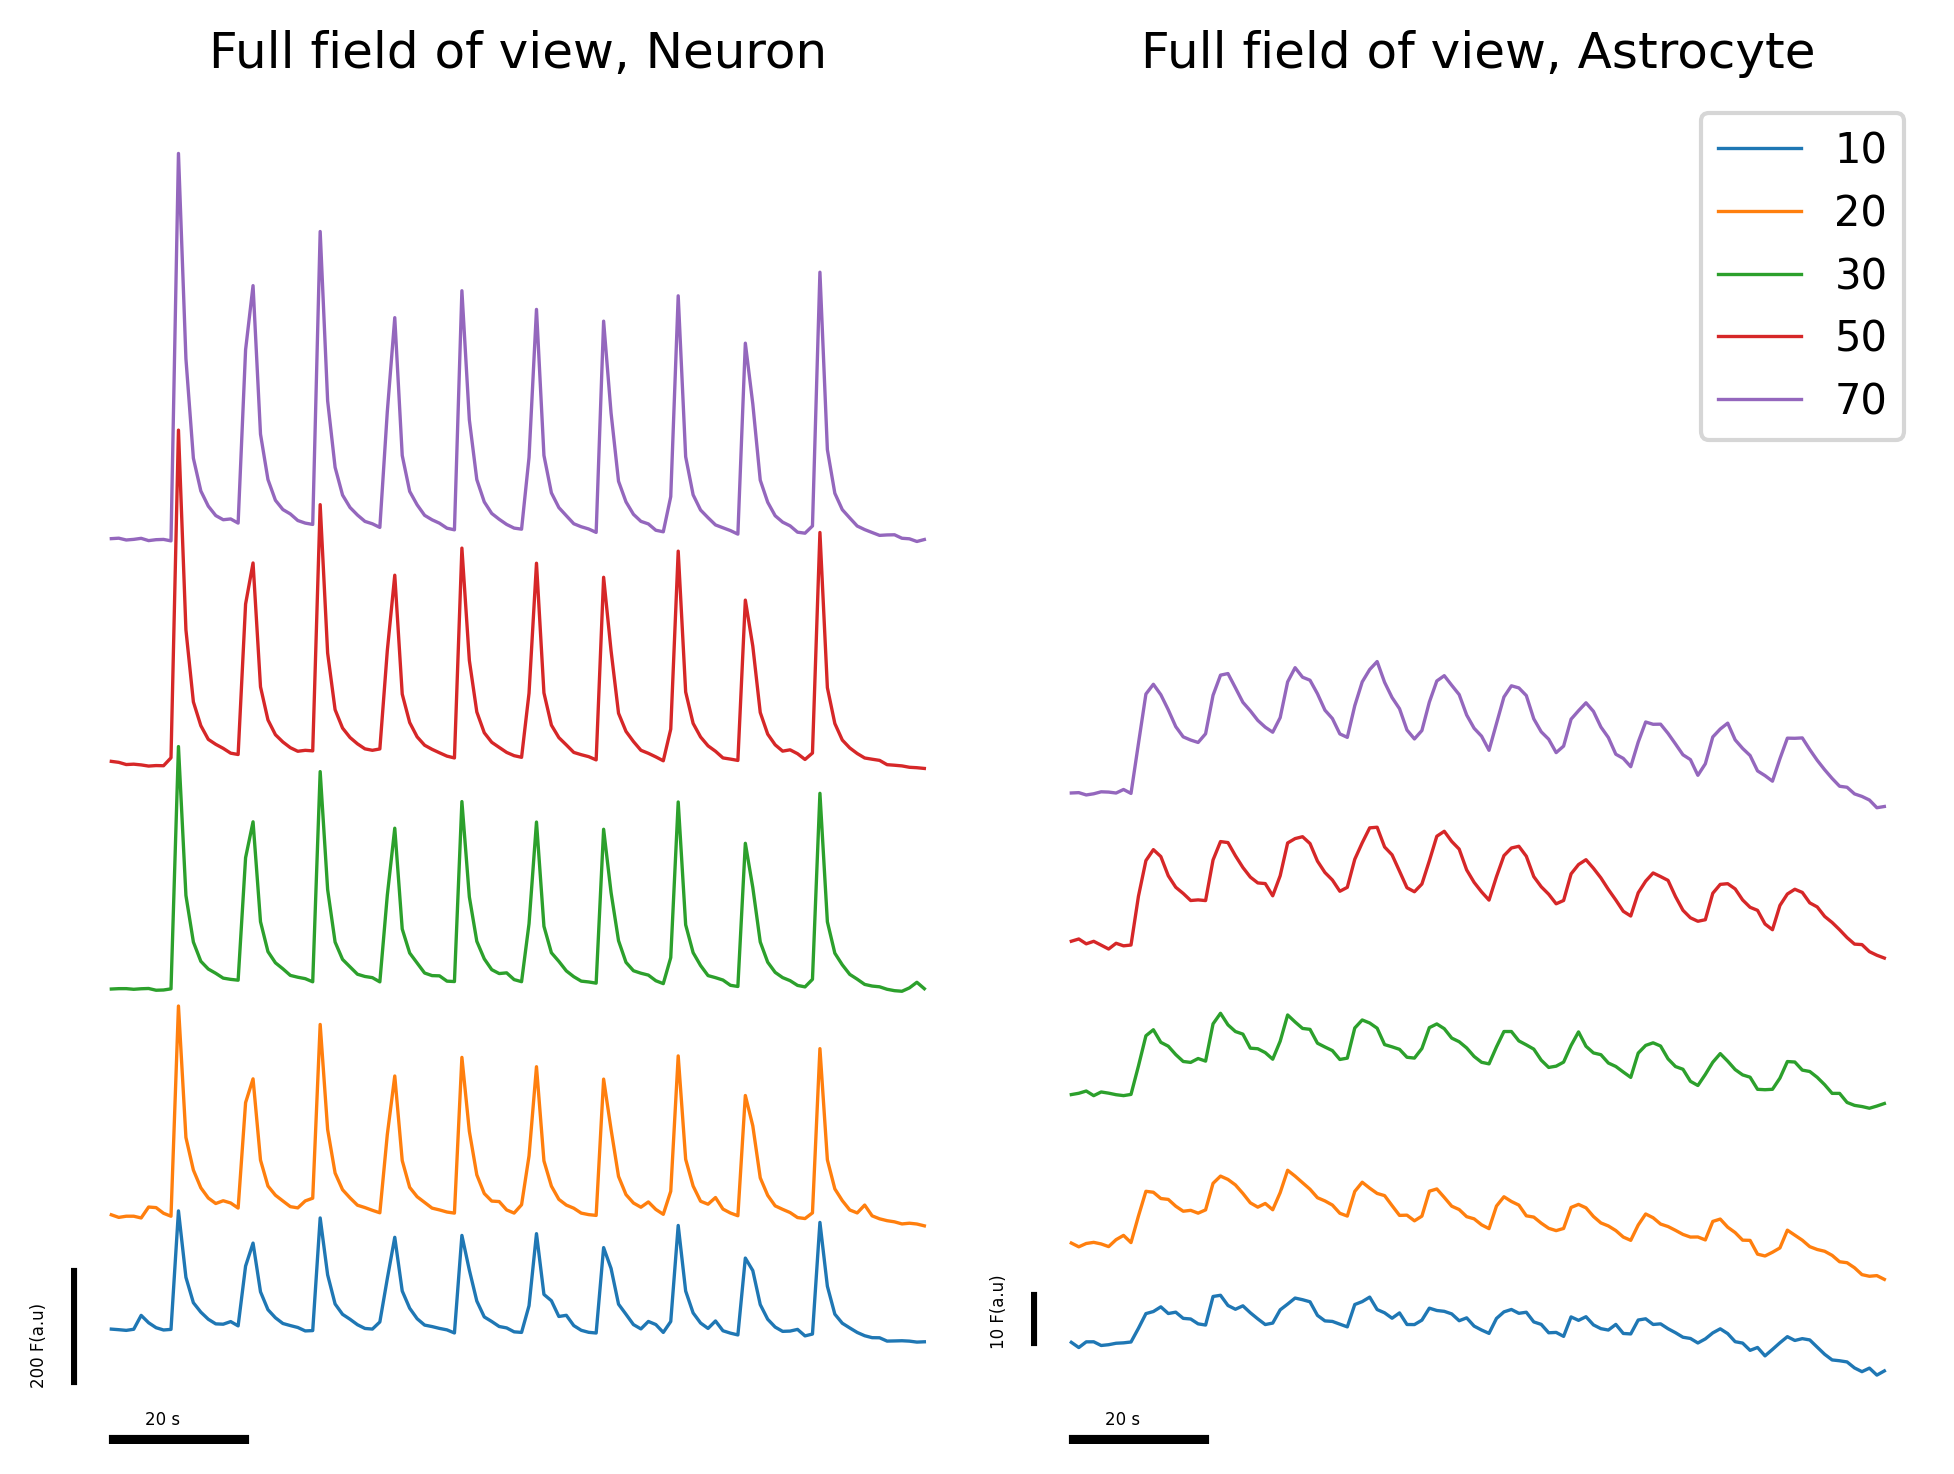

In [4]:
fig, ax = plt.subplots(1, 2, layout = 'compressed', dpi = 300)
time = np.arange(n.shape[0])/m_info['fs']
y_axis_height = [200, 10, 10, 10]
offsets = [
    [100, 300, 700, 1100, 1500],
    [0, 20, 50, 80, 110],
    [10, 20, 30, 40, 60],
    [7*i for i in range(6)]
]
for row in range(1):
    for col in range(2):
        a = ax[col]
        index = row*2 + col
        offset = offsets[index]
        for i, key in enumerate(sorted(all_dics[index].keys())):
            a.plot(
                time[:300],
                all_dics[index][key][:300] + offset[i],
                label = key,
                linewidth = 0.8
                )
        a.set_xticks([])
        a.set_yticks([])
        for axis in ['top','right', 'bottom', 'left']:
            a.spines[axis].set_linewidth(0)
        # a.legend()

            
        transform = mtl.transforms.blended_transform_factory(a.transData, a.transAxes)
        rect = ptch.Rectangle((0, 0), width=20, height=0.005, color="black", transform=transform)
        a.add_patch(rect)
        a.text(5, 0.015, "20 s", fontsize = 4, transform = transform)

        transform = mtl.transforms.blended_transform_factory(a.transAxes, a.transData)
        rect = ptch.Rectangle((0, 0), width=0.005, height=y_axis_height[index], color="black", transform=transform)
        a.add_patch(rect)
        a.text(-12, 0.015, f"{y_axis_height[index]} F(a.u)", fontsize = 4, rotation = 90)
ax[1].set_ylim(-20, 250)
ax[1].legend()
ax[1].set_title('Full field of view, Astrocyte')
ax[0].set_title('Full field of view, Neuron')
# plotting.save_fig(fig, 1, 'FOV average signal (double zoom on astrocytes)')

In [5]:
astrocytes_dict, neurons_dict = {current:[] for current in currents}, {current:[] for current in currents}

for m_info in input_output.mouse_infos():
    neurons_avg = np.average(m_info['neurons'], axis = (1,2))
    astrocytes_avg = np.average(m_info['astrocytes'], axis = (1, 2))
    ss1 = m_info['stimulations_starts'][0]
    for avg, d in zip((neurons_avg, astrocytes_avg), (neurons_dict, astrocytes_dict)):
        m = np.average(avg[:ss1])
        value = (np.average(avg[ss1:2*ss1]) - m)
        d[m_info['current']].append(value)

5.352 ± 4.270 (N = 5)
5.003 ± 1.041 (N = 5)
6.376 ± 0.813 (N = 4)
12.024 ± 3.620 (N = 4)
16.396 ± 11.078 (N = 5)
WilcoxonResult(statistic=0.0, pvalue=2.384185791015625e-07)
51.197 ± 42.208 (N = 5)
70.014 ± 23.769 (N = 5)
88.839 ± 25.164 (N = 4)
171.728 ± 56.431 (N = 4)
241.500 ± 103.495 (N = 5)
WilcoxonResult(statistic=0.0, pvalue=2.384185791015625e-07)


/tmp/ipykernel_84394/38968075.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, ] + currents)
/tmp/ipykernel_84394/38968075.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, ] + currents)


Text(0.5, 1.0, 'Neuron')

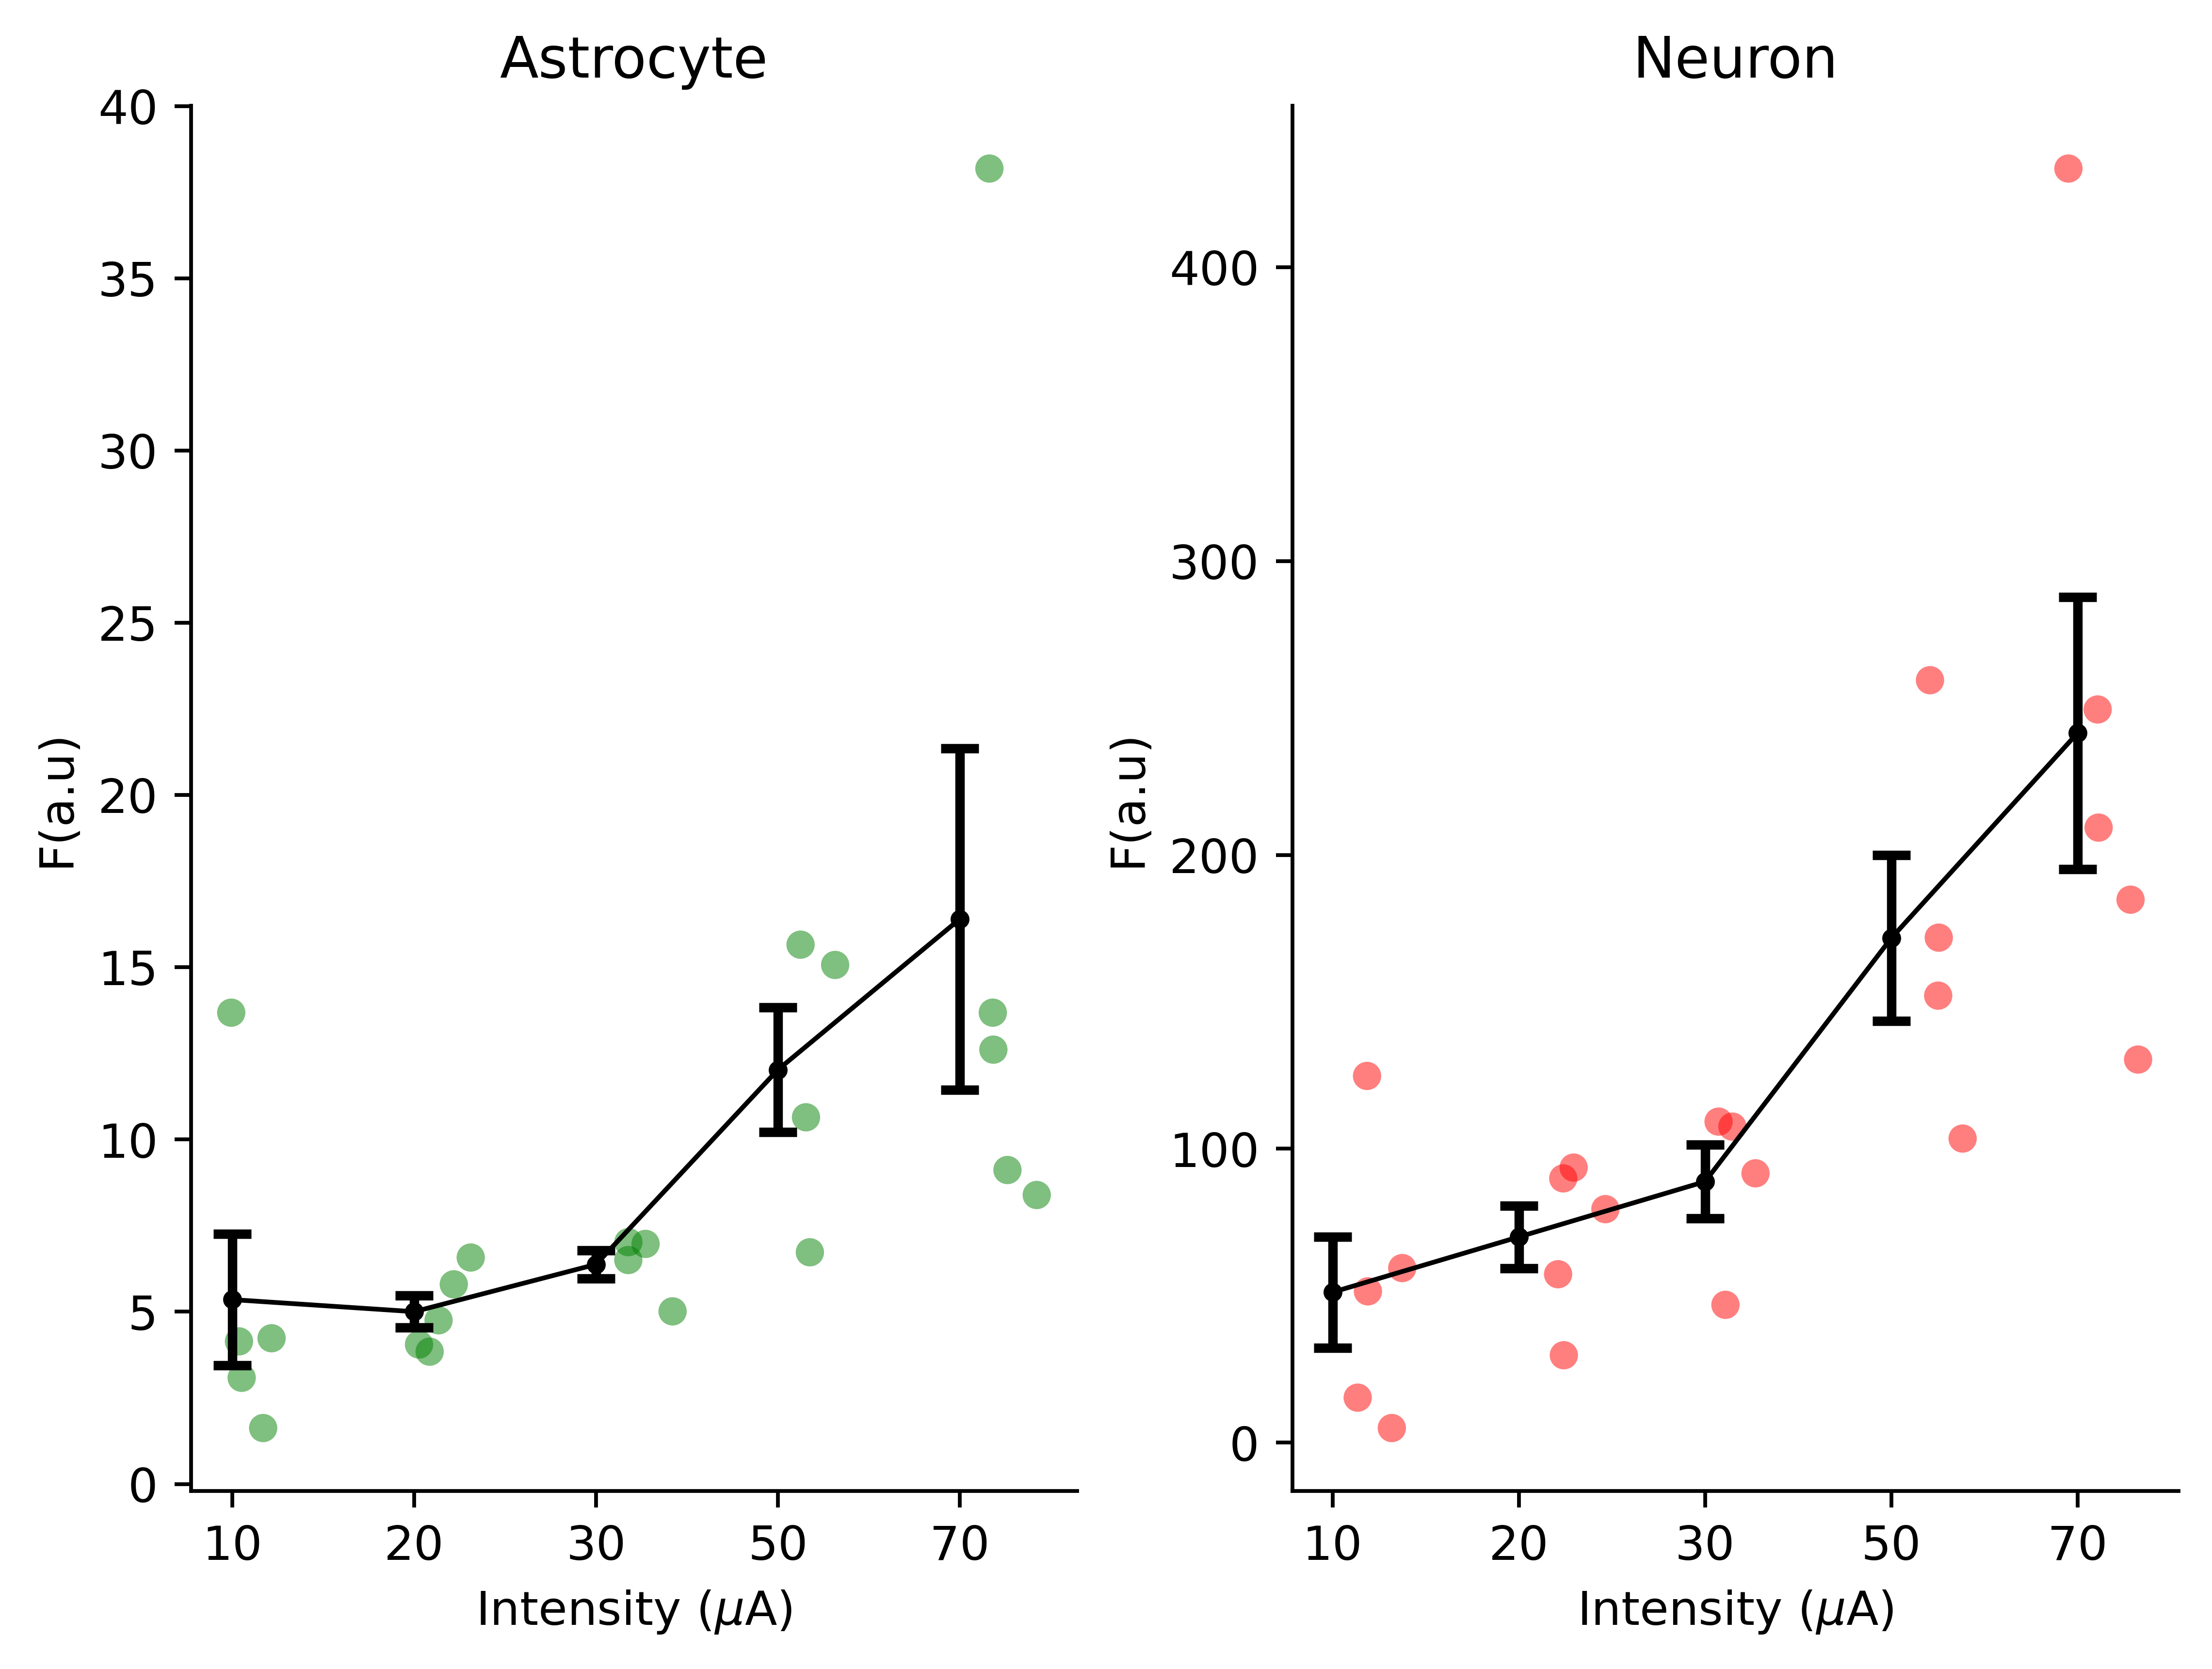

In [7]:
fig, ax = plt.subplots(1, 2, dpi = 700, layout = "compressed")
def partial_plot(ax, dict, color):
    avgs = []
    datas = []
    for index, cur in enumerate(currents):
        data = np.array(dict[cur])
        ax.scatter(x = np.random.normal(index, 0.1, size = data.shape) + 0.2,
                   y = data, 
                   color = color,
                   alpha = 0.5,
                   edgecolors = 'none')
        # print(cur, scipy.stats.wilcoxon(data, alternative='greater'))
        datas.extend(data)
        avg = np.average(data)
        avgs.append(avg)
        std = np.std(data)
        sem = std/np.sqrt(len(data))
        ax.errorbar(x = index, 
                    y = avg, 
                    yerr = sem, 
                    capsize = 4, 
                    fmt = 'o', 
                    color = "black", 
                    linewidth = 2,
                    capthick = 2,
                    ms = 3)
        print(f'{np.average(data):.3f} \u00B1 {np.std(data):.3f} (N = {len(data)})')
        

    ax.plot(np.arange(5), avgs, color = 'black', linewidth = 1)
    ax.set_xlabel(r"Intensity ($\mu$A)")
    ax.set_ylabel('F(a.u)')
    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0)

    ax.set_xticklabels([0, ] + currents)
    print(scipy.stats.wilcoxon(datas))

    

partial_plot(ax[0], astrocytes_dict, 'green')
partial_plot(ax[1], neurons_dict, 'red')
ax[0].set_title('Astrocyte')
ax[1].set_title('Neuron')
# plotting.save_fig(fig, 1, "Reactivity")